# About Datasets Used

## Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

Filename identifiers

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 03-01-06-01-02-01-12.wav

1. Audio-only (03)
2. Speech (01)
3. Fearful (06)
4. Normal intensity (01)
5. Statement "dogs" (02)
6. 1st Repetition (01)
7. 12th Actor (12)
Female, as the actor ID number is even.

## Crowd Sourced Emotional Multimodal Actors Dataset (CREMA-D)

Context

I'm on a journey to create an emotion classifier from audio and the CREMA-D dataset is one of the 4 key datasets that I was lucky to stumble upon. What's interesting is that this dataset is the sheer variety of data which helps train a model that can be generalised across new datasets. Many audio datasets use a limited number of speakers which leads to a lot of information leakage. CREMA-D has many speakers. For this fact, the CREMA-D is a very good dataset to use to ensure the model does not overfit.

Content

CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified).

## Surrey Audio-Visual Expressed Emotion (SAVEE)

Context

I'm on a journey to create an emotion classifier from audio and the SAVEE dataset is one of the 4 key datasets that I was lucky to stumble upon. What's interesting is that this dataset is male only and is of very high quality audio. Because the male only speaker will bring about a slightly imbalance representation, it would be advisable to complement other datasets with more female speakers

Content

The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. A neutral category is also added to provide recordings of 7 emotion categories.

The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences. This resulted in a total of 120 utterances per speaker

## Toronto emotional speech set (TESS)

Context

I'm on a journey to create an emotion classifier from audio and the TESS dataset is one of the 4 key datasets that I was lucky to stumble upon. What's interesting is that this dataset is female only and is of very high quality audio. Most of the other dataset is skewed towards male speakers and thus brings about a slightly imbalance representation. So because of that, this dataset would serve a very good training dataset for the emotion classifier in terms of generalisation (not overfitting)

Content

There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import math
import seaborn as sns
from tqdm import tqdm
from scipy.fft import rfft , rfftfreq , irfft
import soundfile as sf
import os
import soundfile as sf
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.layers import Dense,LSTM,Dropout,BatchNormalization
from keras import layers
from tensorflow.keras import regularizers
from sklearn import preprocessing

In [23]:

dataset_path = "../Datasets/"

dataset1_path = dataset_path + "RAVDESS" + "/"
dataset2_path = dataset_path + "CREMA-D" + "/" + "AudioWAV/"
dataset3_path = dataset_path + "SAVEE" + "/" + "ALL/" 
dataset4_path = dataset_path + "TESS" + "/"


### RAVDESS

In [24]:
# CODE TAKEN FROM: https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition/notebook
Ravdess = dataset1_path
ravdess_directory_list = os.listdir(Ravdess)[:-1]

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
print("SHAPE:" , Ravdess_df.shape)
print(Ravdess_df["Emotions"].value_counts())
Ravdess_df.head()

SHAPE: (1440, 2)
calm        192
surprise    192
happy       192
fear        192
sad         192
angry       192
disgust     192
neutral      96
Name: Emotions, dtype: int64


,Emotions,Path
0,neutral,../Datasets/RAVDESS/Actor_01/03-01-01-01-01-01...
1,neutral,../Datasets/RAVDESS/Actor_01/03-01-01-01-01-02...
2,neutral,../Datasets/RAVDESS/Actor_01/03-01-01-01-02-01...
3,neutral,../Datasets/RAVDESS/Actor_01/03-01-01-01-02-02...
4,calm,../Datasets/RAVDESS/Actor_01/03-01-02-01-01-01...


In [26]:
Ravdess_df.to_csv("Final Dataframe.csv")

### CREMA-D

In [136]:
Crema = dataset2_path
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,Datasets/CREMA-D/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,Datasets/CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,Datasets/CREMA-D/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,Datasets/CREMA-D/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,Datasets/CREMA-D/AudioWAV/1001_DFA_NEU_XX.wav


### SAVEE

In [137]:
Savee = dataset3_path
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,Datasets/SAVEE/ALL/DC_a01.wav
1,angry,Datasets/SAVEE/ALL/DC_a02.wav
2,angry,Datasets/SAVEE/ALL/DC_a03.wav
3,angry,Datasets/SAVEE/ALL/DC_a04.wav
4,angry,Datasets/SAVEE/ALL/DC_a05.wav


### TESS

In [138]:
Tess = dataset4_path
tess_directory_list = os.listdir(Tess)
tess_directory_list.remove('TESS Toronto emotional speech set data')
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,Datasets/TESS/OAF_angry/OAF_back_angry.wav
1,angry,Datasets/TESS/OAF_angry/OAF_bar_angry.wav
2,angry,Datasets/TESS/OAF_angry/OAF_base_angry.wav
3,angry,Datasets/TESS/OAF_angry/OAF_bath_angry.wav
4,angry,Datasets/TESS/OAF_angry/OAF_bean_angry.wav


In [139]:
df = pd.concat([Ravdess_df , Crema_df , Savee_df , Tess_df])
df

,Emotions,Path
0,neutral,Datasets/RAVDESS/Actor_01/03-01-01-01-01-01-01...
1,neutral,Datasets/RAVDESS/Actor_01/03-01-01-01-01-02-01...
2,neutral,Datasets/RAVDESS/Actor_01/03-01-01-01-02-01-01...
3,neutral,Datasets/RAVDESS/Actor_01/03-01-01-01-02-02-01...
4,calm,Datasets/RAVDESS/Actor_01/03-01-02-01-01-01-01...
...,...,...
2795,sad,Datasets/TESS/YAF_sad/YAF_witch_sad.wav
2796,sad,Datasets/TESS/YAF_sad/YAF_yearn_sad.wav
2797,sad,Datasets/TESS/YAF_sad/YAF_yes_sad.wav
2798,sad,Datasets/TESS/YAF_sad/YAF_young_sad.wav


In [140]:
df.to_csv("Final Dataframe.csv" , index = False)

## Data Pre-processing

In [17]:
os.chdir("./mod1")

In [27]:
df = pd.read_csv("Final Dataframe.csv")

# df = df[(df["Emotions"] == "angry") |
#         (df["Emotions"] == "happy") |
#         (df["Emotions"] == "sad") |
#         (df["Emotions"] == "fear")]


Y = df["Emotions"]
df_train, df_test = train_test_split(df, test_size=0.20, random_state=26 , stratify = Y)
df_train, df_val = train_test_split(df_train, test_size=0.20, random_state=26)

print("Train:" , df_train.shape[0])
print("Validation:" , df_val.shape[0])
print("Test:" , df_test.shape[0])
df_train

Train: 921
Validation: 231
Test: 288


In [36]:
df_val.to_csv("Validation.csv")
df_test.to_csv("Test.csv")

### Data Augmentation

In [29]:
def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal


def time_stretch(signal, time_stretch_rate):
    """Time stretching implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.time_stretch(signal, time_stretch_rate)


def pitch_shift(signal, sr, num_semitones):
    """Pitch scaling implemented with librosa:
    https://librosa.org/doc/main/generated/librosa.effects.pitch_shift.html?highlight=pitch%20shift#librosa.effects.pitch_shift
    """
    return librosa.effects.pitch_shift(signal, sr=sr, n_steps=num_semitones)


def random_gain(signal, min_factor=0.1, max_factor=0.12):
    gain_rate = np.random.uniform(min_factor, max_factor)
    augmented_signal = signal * gain_rate
    return augmented_signal


def time_shift_with_gaussian(signal , sr , name ,label , save_path ,avg_time_shift_by=4):
    
    shift_by = np.random.normal(sr/avg_time_shift_by , sr/4)  #0.25 seconds
    
    wav_roll = np.roll(signal , int(shift_by))
    aug_signal = add_white_noise(wav_roll , 0.25)
    
    file_name = name[:-4] + "_TimeShifted_" + str(round(len(signal)/shift_by , 2)) + ".wav"
    file_category = label
    
    sf.write(save_path + file_name, aug_signal, sr, 'PCM_24')

    return file_name,file_category
        
def augment_signal(signal , sr , name ,label , save_path = "Audios - Train/",pitch_shifts=1 ,pitch_shift_by=4,time_shift_factor=4):

    file_names = []
    file_emotions = []
#     aug_signal = add_white_noise(signal,0.25)
#     file_names,file_emotions = time_shift_with_gaussian(signal , sr , name , label , save_path)

    # PITCH_SHIFT__+__TIME_INVARIANCE
    
    i = 0
    while(i < pitch_shifts):
        pitch_shifted_signal_1 = random_gain(pitch_shift(signal , sr , (i+pitch_shift_by)))
        pitch_shifted_signal_2 = random_gain(pitch_shift(signal , sr , -(i+pitch_shift_by)))
        
        file_name_1 = name[:-4] + "_PitchShiftRG_H" + str(i) + ".wav"
        file_name_2 = name[:-4] + "_PitchShiftRG_L" + str(i) + ".wav"
        
        file_names_pss1,file_emotions_pss1 = time_shift_with_gaussian(pitch_shifted_signal_1 , sr , file_name_1 , label , save_path, time_shift_factor)
        file_names_pss2,file_emotions_pss2 = time_shift_with_gaussian(pitch_shifted_signal_2 , sr , file_name_2 , label , save_path, time_shift_factor)
        
#         sf.write(save_path + file_name_1, pitch_shifted_signal_1, sr, 'PCM_24')
#         sf.write(save_path + file_name_2, pitch_shifted_signal_2, sr, 'PCM_24')
        
        file_names.append(save_path + file_names_pss1)
        file_names.append(save_path + file_names_pss2)
        file_emotions.append(file_emotions_pss1)
        file_emotions.append(file_emotions_pss2)
        
#         file_names.append(save_path + file_name_1)
#         file_names.append(save_path + file_name_2)
#         file_emotions.append(label)
#         file_emotions.append(label)
        
        i+=1
        
    return file_names,file_emotions
        
    
    
def augment_signal_time_invariance(signal , sr , name ,label , save_path = "Audios - Train/",avg_time_shift_by=5):
    new_file_names = []
    new_file_categories = []
    
    i=5
    while (i>0):
        
        file_name,file_category = time_shift_with_gaussian(signal , sr , name , label , save_path, avg_time_shift_by)
        
        new_file_names.append(save_path + file_name)
        new_file_categories.append(label)
        
        i-=1
        
    return new_file_names, new_file_categories
    


#### Training-1

In [30]:
save_path = "Audios - Train 1/"
new_file_paths = []
new_labels = []
for i,label in enumerate(tqdm(df_train["Emotions"])):
    
    path = df_train.iloc[i]["Path"]
    signal,sr = librosa.load(path)
    
    name = path[path.rfind("/")+1:]
    sf.write(save_path + name, signal, sr, 'PCM_24')
    new_file_paths.append(save_path + name)
    new_labels.append(label)
    
    file_names , file_emotions = augment_signal(signal , sr ,"Aug_" + name , label , save_path)
    
    new_file_paths.extend(file_names)
    new_labels.extend(file_emotions)
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 921/921 [05:18<00:00,  2.89it/s]


In [31]:
df_temp = pd.DataFrame()
df_temp["Emotions"] = new_labels
df_temp["Path"] = new_file_paths
df_temp.to_csv("Train-1.csv" , index = False)

#### Training-2

In [33]:
save_path = "Audios - Train 2/"

new_file_paths = []
new_labels = []
for i,label in enumerate(tqdm(df_train["Emotions"])):
    
    path = df_train.iloc[i]["Path"]
    signal,sr = librosa.load(path)
    
    name = path[path.rfind("/")+1:]
    sf.write(save_path + name, signal, sr, 'PCM_24')
    new_file_paths.append(save_path + name)
    new_labels.append(label)
    
    file_names , file_emotions = augment_signal(signal , sr ,"Aug_" + name , label , save_path,pitch_shift_by=2,time_shift_factor=2)
    
    new_file_paths.extend(file_names)
    new_labels.extend(file_emotions)
    

100%|████████████████████████████████████████████████████████████████████████████████| 921/921 [04:54<00:00,  3.13it/s]


In [34]:
df_temp = pd.DataFrame()
df_temp["Emotions"] = new_labels
df_temp["Path"] = new_file_paths
df_temp.to_csv("Train-2.csv" , index = False)

#### Training-3

In [5]:
save_path = "Audios - Train 3/"
# Emotion Detection Training Data/

new_file_paths = []
new_labels = []
for i,label in enumerate(tqdm(df_train["Emotions"])):
    
    path = df_train.iloc[i]["Path"]
    signal,sr = librosa.load(path)
    
    name = path[path.rfind("/")+1:]
    sf.write(save_path + name, signal, sr, 'PCM_24')
    new_file_paths.append(save_path + name)
    new_labels.append(label)
    
    file_names , file_emotions = augment_signal_time_invariance(signal , sr ,"Aug" + name , label , save_path ,avg_time_shift_by=5)
    
    new_file_paths.extend(file_names)
    new_labels.extend(file_emotions)
    

100%|██████████████████████████████████████████████████████████████████████████████| 4922/4922 [05:54<00:00, 13.89it/s]


In [6]:
df_temp = pd.DataFrame()
df_temp["Emotions"] = new_labels
df_temp["Path"] = new_file_paths
df_temp.to_csv("Train-3.csv" , index = False)

In [42]:
df_val.to_csv("Validation.csv" , index = False)
df_test.to_csv("Test.csv" , index = False)

### Feature Extraction Using MFCC

In [37]:
df_train_1 = pd.read_csv("Train-1.csv")
df_train_2 = pd.read_csv("Train-2.csv")
# df_train_3 = pd.read_csv("Train-3.csv")
df_train = pd.concat([df_train_1 , df_train_2] , axis = 0)
df_val = pd.read_csv("Validation.csv")
df_test = pd.read_csv("Test.csv")

In [39]:
print("\tTRAIN")
print(df_train["Emotions"].value_counts())
print("\n\n\tVALIDATION")
print(df_val["Emotions"].value_counts())
print("\n\n\tTEST")
print(df_test["Emotions"].value_counts())

	TRAIN
disgust     768
calm        744
happy       738
angry       738
fear        732
surprise    720
sad         714
neutral     372
Name: Emotions, dtype: int64


	VALIDATION
surprise    34
sad         34
fear        32
happy       31
angry       30
calm        29
disgust     26
neutral     15
Name: Emotions, dtype: int64


	TEST
calm        39
angry       39
sad         39
happy       38
disgust     38
surprise    38
fear        38
neutral     19
Name: Emotions, dtype: int64


In [59]:
# _____________________________________
# FOR CHECKING MAXIMUM CLIP SIZE
# ______________________________________


duration = []
i = 0
while (i < df_train.shape[0]):
    
    path = df_train.iloc[i]["Path"]
    clip,sr = librosa.load(path)
#     print("i =",i,"\tsr = ",sr)
    duration.append(len(clip)/sr)
#     i+=9
    i+=1
    print(i,end="\r")    

print("Max duration at:", np.argmax(duration))
print("Max duration:" , duration[np.argmax(duration)])
# print(duration)

Max duration at: 18
Max duration: 5.2719727891156465


In [65]:
sr

22050

<AxesSubplot:ylabel='Density'>

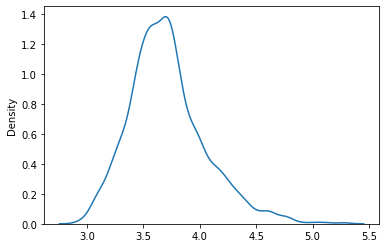

In [63]:
sns.kdeplot(duration)

In [66]:
def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std()+0.050, signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal


def get_mfcc(audio , sr , num_mfcc=15 , n_fft=2048 , hop_length=512 , plot = False):
    mfcc = librosa.feature.mfcc(y=audio , sr=sr , n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
    del_mfcc = librosa.feature.delta(mfcc)
    del2_mfcc = librosa.feature.delta(mfcc, order = 2)
    features = np.concatenate([mfcc , del_mfcc, del2_mfcc])
    
    
    if (plot == True):
        librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length)
        plt.xlabel("Time")
        plt.ylabel("MFCC coefficients")
        plt.colorbar()
        plt.title("MFCCs")

        # show plots
        plt.show()
        
    return features.T

def get_audio_features(path , mfcc_coeff = 15 , max_duration = 4*22050 , to_plot = False) :
    
    clip,sr = librosa.load(path)

    if (clip.shape[0] < max_duration):
        while(clip.shape[0] < max_duration):
            padding = clip[ : max_duration - clip.shape[0]]
            clip = np.append(clip , padding)
        
    elif(clip.shape[0] > max_duration):
        clip = clip[:max_duration]
        
    data = get_mfcc(np.array(clip),sr, num_mfcc = mfcc_coeff , plot = to_plot) 
    return np.array(data)

#### For Train-1 and Train-2

In [69]:
og_data = []
for path in tqdm(df_train["Path"]):
    data = get_audio_features(path = path)
    og_data.append(data)
    
X_train = np.array(og_data) 
np.save("Training Data - Extracted Features - MFCC_15" , X_train)

100%|██████████████████████████████████████████████████████████████████████████████| 5526/5526 [00:59<00:00, 93.39it/s]


#### For Validation & Test

In [70]:
val_data = []
for path in tqdm(df_val["Path"]):
    data = get_audio_features(path = path)
    val_data.append(data)
    
X_val = np.array(val_data) 
np.save("Validation Data - Extracted Features - MFCC_15" , X_val)

100%|████████████████████████████████████████████████████████████████████████████████| 231/231 [00:16<00:00, 13.59it/s]


In [71]:
test_data = []
for path in tqdm(df_test["Path"]):
    data = get_audio_features(path = path)
    test_data.append(data)
    
X_test = np.array(test_data) 
np.save("Test Data - Extracted Features - MFCC_15" , X_test)

100%|████████████████████████████████████████████████████████████████████████████████| 288/288 [00:22<00:00, 12.96it/s]


#### For Train-3

In [10]:
df_train = pd.read_csv("Train-3.csv")

mfcc_coeff = 25
og_data = []
for path in tqdm(df_train["Path"]):
    data = get_audio_features(path = path , mfcc_coeff=mfcc_coeff)
    og_data.append(data)
    
X_train = np.array(og_data) 
np.save("Training Data3 - Extracted Features - MFCC_25" , X_train)

100%|████████████████████████████████████████████████████████████████████████████| 29532/29532 [18:06<00:00, 27.18it/s]


### Featurization using Spectrograms

# Model Building

## Training LSTM-MLP

In [2]:
df_train = pd.concat([pd.read_csv("Train-1.csv") , pd.read_csv("Train-2.csv")] , axis = 0)
df_val = pd.read_csv("Validation.csv")

In [3]:
X_train = np.load("Training Data - Extracted Features - MFCC_15.npy")
y_train = df_train["Emotions"] 

X_val = np.load("Validation Data - Extracted Features - MFCC_15.npy")
y_val = df_val["Emotions"]

one_hot_encoder = preprocessing.LabelBinarizer()
one_hot_encoder.fit(df_train["Emotions"].unique())

y_train = one_hot_encoder.transform(y_train)
y_val = one_hot_encoder.transform(y_val)



In [4]:
print("Train:" , X_train.shape)
print("Val:" , X_val.shape)
# print("Test:" , X_test.shape)

Train: (59064, 303, 45)
Val: (1231, 303, 45)


In [5]:
print("Classes:" , len(one_hot_encoder.classes_))

Classes: 4


In [6]:
input_shape = X_train.shape[1:]
input_shape

(303, 45)

In [7]:
from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# import tensorflow.keras.backend as K 
# K._get_available_gpus()

Num GPUs Available:  0


In [8]:

model = keras.Sequential()
model.add(LSTM(50, kernel_regularizer = regularizers.L1(0.01) ,input_shape=input_shape , return_sequences=True))
model.add(LSTM(25 , kernel_regularizer = regularizers.L1(0.01)))
model.add(Dense(50, kernel_regularizer = regularizers.L1(0.01) , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, kernel_regularizer = regularizers.L1(0.01) , activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 303, 50)           19200     
                                                                 
 lstm_1 (LSTM)               (None, 25)                7600      
                                                                 
 dense (Dense)               (None, 50)                1300      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 batch_normalization (BatchN  (None, 20)               8

In [83]:
# precision = tf.keras.metrics.Precision()
# recall = tf.keras.metrics.Recall()
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])

In [84]:
# gpu_device = tf.config.experimental.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(gpu_device[0], True)
# # gpu_device[0]


In [86]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_data=(X_val, y_val), shuffle=False )

Epoch 1/50
12/12 [==============================] - 1s 74ms/step - loss: 1.3659 - accuracy: 0.4575 - val_loss: 1.6129 - val_accuracy: 0.4026
Epoch 2/50
12/12 [==============================] - 1s 68ms/step - loss: 1.3484 - accuracy: 0.4546 - val_loss: 1.5633 - val_accuracy: 0.4156
Epoch 3/50
12/12 [==============================] - 1s 65ms/step - loss: 1.3270 - accuracy: 0.4586 - val_loss: 1.5768 - val_accuracy: 0.4026
Epoch 4/50
12/12 [==============================] - 1s 67ms/step - loss: 1.3442 - accuracy: 0.4533 - val_loss: 1.6293 - val_accuracy: 0.3593
Epoch 5/50
12/12 [==============================] - 1s 67ms/step - loss: 1.3366 - accuracy: 0.4589 - val_loss: 1.6809 - val_accuracy: 0.3810
Epoch 6/50
12/12 [==============================] - 1s 68ms/step - loss: 1.3236 - accuracy: 0.4692 - val_loss: 1.6743 - val_accuracy: 0.4069
Epoch 7/50
12/12 [==============================] - 1s 67ms/step - loss: 1.3024 - accuracy: 0.4741 - val_loss: 1.6024 - val_accuracy: 0.4026
Epoch 8/50
12

KeyboardInterrupt: 

In [16]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print(physical_devices)
model.save("mod1_Emotion_Detector_LSTM_v1")

INFO:tensorflow:Assets written to: Emotion_Detector_LSTM_v3\assets


INFO:tensorflow:Assets written to: Emotion_Detector_LSTM_v3\assets


## Training CNN-MLP

In [9]:
model = keras.Sequential()
model.add(layers.Conv1D(128, 5,padding='same',input_shape=input_shape, activation = "relu"))
model.add(layers.MaxPooling1D(pool_size=(4)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv1D(64, 5,padding='same' , activation = "relu"))
model.add(layers.MaxPooling1D(pool_size=(2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(25,activation = "relu"))
model.add(layers.Dense(4,activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 303, 128)          28928     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 75, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 75, 64)            41024     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 37, 64)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 64)            0

In [18]:
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])
history = model.fit(X_train[:25000], y_train[:25000], epochs=20, batch_size=500, validation_data=(X_val, y_val), shuffle=False)

Epoch 1/20
50/50 [==============================] - 5s 89ms/step - loss: 1.1889 - accuracy: 0.6392 - val_loss: 1.2501 - val_accuracy: 0.6637
Epoch 2/20
50/50 [==============================] - 4s 81ms/step - loss: 0.8079 - accuracy: 0.6731 - val_loss: 1.0800 - val_accuracy: 0.6791
Epoch 3/20
50/50 [==============================] - 4s 81ms/step - loss: 0.7147 - accuracy: 0.6956 - val_loss: 0.9499 - val_accuracy: 0.7002
Epoch 4/20
50/50 [==============================] - 4s 81ms/step - loss: 0.6562 - accuracy: 0.7236 - val_loss: 0.9539 - val_accuracy: 0.7051
Epoch 5/20
50/50 [==============================] - 4s 81ms/step - loss: 0.6113 - accuracy: 0.7368 - val_loss: 0.9406 - val_accuracy: 0.7051
Epoch 6/20
50/50 [==============================] - 4s 81ms/step - loss: 0.5984 - accuracy: 0.7442 - val_loss: 0.9499 - val_accuracy: 0.7165
Epoch 7/20
50/50 [==============================] - 4s 81ms/step - loss: 0.5653 - accuracy: 0.7612 - val_loss: 0.9277 - val_accuracy: 0.7149
Epoch 8/20
50

In [12]:
history = model.fit(X_train[25000:40000], y_train[25000:40000], epochs=50, batch_size=500, validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
30/30 [==============================] - 3s 86ms/step - loss: 0.8587 - accuracy: 0.7505 - val_loss: 2.1574 - val_accuracy: 0.6954
Epoch 2/50
30/30 [==============================] - 2s 83ms/step - loss: 0.6449 - accuracy: 0.7457 - val_loss: 1.9185 - val_accuracy: 0.6905
Epoch 3/50
30/30 [==============================] - 3s 84ms/step - loss: 0.5276 - accuracy: 0.7893 - val_loss: 1.5135 - val_accuracy: 0.7035
Epoch 4/50
30/30 [==============================] - 3s 84ms/step - loss: 0.4605 - accuracy: 0.8113 - val_loss: 1.6803 - val_accuracy: 0.7067
Epoch 5/50
30/30 [==============================] - 3s 84ms/step - loss: 0.4109 - accuracy: 0.8379 - val_loss: 1.7433 - val_accuracy: 0.7051
Epoch 6/50
30/30 [==============================] - 3s 84ms/step - loss: 0.3641 - accuracy: 0.8521 - val_loss: 1.4806 - val_accuracy: 0.7084
Epoch 7/50
30/30 [==============================] - 3s 84ms/step - loss: 0.3359 - accuracy: 0.8654 - val_loss: 1.4028 - val_accuracy: 0.7067
Epoch 8/50
30

In [16]:
history = model.fit(X_train[40000:50000], y_train[40000:50000], epochs=50, batch_size=500, validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
20/20 [==============================] - 2s 90ms/step - loss: 1.0784 - accuracy: 0.7336 - val_loss: 2.0320 - val_accuracy: 0.6409
Epoch 2/50
20/20 [==============================] - 2s 85ms/step - loss: 0.6159 - accuracy: 0.7681 - val_loss: 2.0339 - val_accuracy: 0.6807
Epoch 3/50
20/20 [==============================] - 2s 86ms/step - loss: 0.4659 - accuracy: 0.8132 - val_loss: 1.5479 - val_accuracy: 0.7067
Epoch 4/50
20/20 [==============================] - 2s 86ms/step - loss: 0.3655 - accuracy: 0.8525 - val_loss: 1.4302 - val_accuracy: 0.7181
Epoch 5/50
20/20 [==============================] - 2s 86ms/step - loss: 0.3072 - accuracy: 0.8756 - val_loss: 1.5020 - val_accuracy: 0.7076
Epoch 6/50
20/20 [==============================] - 2s 86ms/step - loss: 0.2814 - accuracy: 0.8867 - val_loss: 1.4955 - val_accuracy: 0.7132
Epoch 7/50
20/20 [==============================] - 2s 86ms/step - loss: 0.2377 - accuracy: 0.9081 - val_loss: 1.5335 - val_accuracy: 0.7197
Epoch 8/50
20

In [17]:
history = model.fit(X_train[50000:], y_train[50000:], epochs=50, batch_size=100, validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
91/91 [==============================] - 3s 25ms/step - loss: 1.2314 - accuracy: 0.5441 - val_loss: 1.8593 - val_accuracy: 0.4679
Epoch 2/50
91/91 [==============================] - 2s 23ms/step - loss: 0.8699 - accuracy: 0.6134 - val_loss: 1.0803 - val_accuracy: 0.5727
Epoch 3/50
91/91 [==============================] - 2s 23ms/step - loss: 0.7555 - accuracy: 0.6677 - val_loss: 1.0424 - val_accuracy: 0.6296
Epoch 4/50
91/91 [==============================] - 2s 24ms/step - loss: 0.6759 - accuracy: 0.7020 - val_loss: 0.9304 - val_accuracy: 0.6214
Epoch 5/50
91/91 [==============================] - 2s 23ms/step - loss: 0.6234 - accuracy: 0.7287 - val_loss: 1.1106 - val_accuracy: 0.6288
Epoch 6/50
91/91 [==============================] - 2s 23ms/step - loss: 0.5711 - accuracy: 0.7549 - val_loss: 1.0507 - val_accuracy: 0.6523
Epoch 7/50
91/91 [==============================] - 2s 24ms/step - loss: 0.5494 - accuracy: 0.7656 - val_loss: 1.2401 - val_accuracy: 0.6328
Epoch 8/50
91

In [19]:
model.save("Emotion_Detector_CNN_v3")

INFO:tensorflow:Assets written to: Emotion_Detector_CNN_v3\assets


INFO:tensorflow:Assets written to: Emotion_Detector_CNN_v3\assets


#### Train-3

##### LSTM-MLP

In [48]:
model = keras.models.load_model("Emotion_Detector_new_v2")
df_train = pd.read_csv("Train-3.csv")
df_val = pd.read_csv("Validation.csv")

In [49]:
X_train = np.load("Training Data3 - Extracted Features - MFCC_25.npy")
y_train = df_train["Emotions"] 

X_val = np.load("Validation Data - Extracted Features - MFCC_25.npy")
y_val = df_val["Emotions"]

one_hot_encoder = preprocessing.LabelBinarizer()
one_hot_encoder.fit(df_train["Emotions"].unique())

y_train = one_hot_encoder.transform(y_train)
y_val = one_hot_encoder.transform(y_val)



In [50]:
print("Train:" , X_train.shape)
print("Val:" , X_val.shape)
# print("Test:" , X_test.shape)

Train: (29532, 303, 25)
Val: (1231, 303, 25)


In [51]:
print("Classes:" , len(one_hot_encoder.classes_))

Classes: 4


In [52]:
input_shape = X_train.shape[1:]
input_shape

(303, 25)

In [53]:
from tensorflow.python.client import device_lib
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [54]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
60/60 [==============================] - 6s 102ms/step - loss: 0.9293 - accuracy: 0.6127 - val_loss: 0.8899 - val_accuracy: 0.6190
Epoch 2/50
60/60 [==============================] - 6s 101ms/step - loss: 0.8208 - accuracy: 0.6490 - val_loss: 0.8614 - val_accuracy: 0.6288
Epoch 3/50
60/60 [==============================] - 6s 100ms/step - loss: 0.7836 - accuracy: 0.6648 - val_loss: 0.8609 - val_accuracy: 0.6255
Epoch 4/50
60/60 [==============================] - 6s 101ms/step - loss: 0.7643 - accuracy: 0.6693 - val_loss: 0.8587 - val_accuracy: 0.6353
Epoch 5/50
60/60 [==============================] - 6s 101ms/step - loss: 0.7480 - accuracy: 0.6788 - val_loss: 0.8384 - val_accuracy: 0.6442
Epoch 6/50
60/60 [==============================] - 6s 102ms/step - loss: 0.7302 - accuracy: 0.6867 - val_loss: 0.8415 - val_accuracy: 0.6418
Epoch 7/50
60/60 [==============================] - 6s 101ms/step - loss: 0.7236 - accuracy: 0.6879 - val_loss: 0.8517 - val_accuracy: 0.6393
Epoch 

In [55]:
model.save("Emotion_Detector_new_v2")

INFO:tensorflow:Assets written to: Emotion_Detector_new_v2\assets


INFO:tensorflow:Assets written to: Emotion_Detector_new_v2\assets


##### CNN

In [57]:
model = keras.models.load_model("Emotion_Detector_new_CNN_v2")

In [58]:
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
60/60 [==============================] - 5s 74ms/step - loss: 0.1719 - accuracy: 0.9345 - val_loss: 1.8509 - val_accuracy: 0.7400
Epoch 2/50
60/60 [==============================] - 4s 68ms/step - loss: 0.1574 - accuracy: 0.9402 - val_loss: 1.8037 - val_accuracy: 0.7425
Epoch 3/50
60/60 [==============================] - 4s 68ms/step - loss: 0.1505 - accuracy: 0.9427 - val_loss: 1.7518 - val_accuracy: 0.7238
Epoch 4/50
60/60 [==============================] - 4s 68ms/step - loss: 0.1606 - accuracy: 0.9394 - val_loss: 2.1389 - val_accuracy: 0.7409
Epoch 5/50
60/60 [==============================] - 4s 68ms/step - loss: 0.1509 - accuracy: 0.9436 - val_loss: 2.4488 - val_accuracy: 0.7433
Epoch 6/50
60/60 [==============================] - 4s 68ms/step - loss: 0.1516 - accuracy: 0.9429 - val_loss: 2.1439 - val_accuracy: 0.7262
Epoch 7/50
60/60 [==============================] - 4s 68ms/step - loss: 0.1472 - accuracy: 0.9451 - val_loss: 2.8443 - val_accuracy: 0.7376
Epoch 8/50
60

In [62]:
model.save("Emotion_Detector_new_CNN_v2")

INFO:tensorflow:Assets written to: Emotion_Detector_new_CNN_v2\assets


INFO:tensorflow:Assets written to: Emotion_Detector_new_CNN_v2\assets


#### LSTM-CNN using Train-1 & Train-2

##### LSTM-CNN

In [2]:
# df_train_1 = pd.read_csv("Train-1.csv")
# df_train_2 = pd.read_csv("Train-2.csv")
df_train = pd.concat([pd.read_csv("Train-1.csv"),
                      pd.read_csv("Train-2.csv"),] , axis = 0)
df_val = pd.read_csv("Validation.csv")

In [3]:
X_train = np.load("Training Data3 - Extracted Features - MFCC_25.npy")
y_train = df_train["Emotions"] 

X_val = np.load("Validation Data - Extracted Features - MFCC_25.npy")
y_val = df_val["Emotions"]

one_hot_encoder = preprocessing.LabelBinarizer()
one_hot_encoder.fit(df_train["Emotions"].unique())

y_train = one_hot_encoder.transform(y_train)
y_val = one_hot_encoder.transform(y_val)

In [4]:
print("Train:" , X_train.shape)
print("Val:" , X_val.shape)
# print("Test:" , X_test.shape)

Train: (29532, 303, 25)
Val: (1231, 303, 25)


In [5]:
print("Classes:" , len(one_hot_encoder.classes_))

Classes: 4


In [6]:
input_shape = X_train.shape[1:]
input_shape

(303, 25)

In [7]:
from tensorflow.python.client import device_lib
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [12]:
model = keras.Sequential()
model.add(layers.LSTM(25 , return_sequences = True , input_shape = input_shape))
model.add(layers.Conv1D(64, 5, padding = "same" , activation = "relu"))
model.add(layers.Conv1D(32, 5, padding = "same", activation = "relu"))
model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
model.add(layers.LSTM(25))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

# model.build(input_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 303, 25)           5100      
                                                                 
 conv1d_6 (Conv1D)           (None, 303, 64)           8064      
                                                                 
 conv1d_7 (Conv1D)           (None, 303, 32)           10272     
                                                                 
 dropout_4 (Dropout)         (None, 303, 32)           0         
                                                                 
 lstm_7 (LSTM)               (None, 25)                5800      
                                                                 
 dense_9 (Dense)             (None, 20)                520       
                                                                 
 batch_normalization_3 (Batc  (None, 20)              

In [13]:
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_data=(X_val, y_val), shuffle=False)

Epoch 1/50
30/30 [==============================] - 10s 227ms/step - loss: 1.3903 - accuracy: 0.2490 - val_loss: 1.3857 - val_accuracy: 0.2616
Epoch 2/50
30/30 [==============================] - 6s 196ms/step - loss: 1.3865 - accuracy: 0.2547 - val_loss: 1.3865 - val_accuracy: 0.2218
Epoch 3/50
30/30 [==============================] - 6s 194ms/step - loss: 1.3863 - accuracy: 0.2534 - val_loss: 1.3867 - val_accuracy: 0.2226
Epoch 4/50
30/30 [==============================] - 6s 196ms/step - loss: 1.3861 - accuracy: 0.2573 - val_loss: 1.3870 - val_accuracy: 0.2218
Epoch 5/50
30/30 [==============================] - 6s 195ms/step - loss: 1.3861 - accuracy: 0.2565 - val_loss: 1.3870 - val_accuracy: 0.2218
Epoch 6/50


KeyboardInterrupt: 

In [ ]:
model.save("Emotion_Detector_LSTM_CNN_v1")

# Testing

In [28]:
model = keras.models.load_model("Emotion_Detector_LSTM_v3")

In [ ]:
df_test = pd.read_csv("Test.csv")
X_test = np.load("Test Data - Extracted Features - MFCC_15.npy")
y_test = df_test["Emotions"]

one_hot_encoder = preprocessing.LabelBinarizer()
one_hot_encoder.fit(pd.read_csv("Train-1.csv")["Emotions"].unique())
y_test = one_hot_encoder.transform(y_test)

In [29]:
list(one_hot_encoder.classes_)

['angry', 'fear', 'happy', 'sad']

In [30]:
# X_test.shape = (1,data.shape[0],data.shape[1])
from sklearn.metrics import classification_report as cr

y_prob = model.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)
print(cr(y_true, y_pred , target_names=one_hot_encoder.classes_))

49/49 [==============================] - 2s 18ms/step
              precision    recall  f1-score   support

       angry       0.77      0.75      0.76       385
        fear       0.72      0.33      0.45       385
       happy       0.54      0.70      0.61       385
         sad       0.66      0.85      0.74       384

    accuracy                           0.66      1539
   macro avg       0.67      0.66      0.64      1539
weighted avg       0.67      0.66      0.64      1539



In [66]:
##OLD

# X_test.shape = (1,data.shape[0],data.shape[1])
from sklearn.metrics import classification_report as cr

y_prob = model.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)
print(cr(y_true, y_pred , target_names=one_hot_encoder.classes_))

49/49 [==============================] - 2s 19ms/step
              precision    recall  f1-score   support

       angry       0.69      0.83      0.75       385
        fear       0.58      0.31      0.40       385
       happy       0.62      0.54      0.58       385
         sad       0.60      0.85      0.70       384

    accuracy                           0.63      1539
   macro avg       0.62      0.63      0.61      1539
weighted avg       0.62      0.63      0.61      1539



In [34]:
model = keras.models.load_model("Emotion_Detector_new_CNN_v2")

In [35]:
# OLD
# __________________________________
df_test = pd.read_csv("Test.csv")
X_test = np.load("Test Data - Extracted Features - MFCC_25.npy")
y_test = df_test["Emotions"] 

one_hot_encoder = preprocessing.LabelBinarizer()
one_hot_encoder.fit(pd.read_csv("Train-1.csv")["Emotions"].unique())
y_test = one_hot_encoder.transform(y_test)
y_prob = model.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)
print(cr(y_true, y_pred , target_names=one_hot_encoder.classes_))

49/49 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       angry       0.75      0.88      0.81       385
        fear       0.62      0.64      0.63       385
       happy       0.71      0.63      0.67       385
         sad       0.76      0.69      0.72       384

    accuracy                           0.71      1539
   macro avg       0.71      0.71      0.71      1539
weighted avg       0.71      0.71      0.71      1539



In [36]:
model = keras.models.load_model("Emotion_Detector_CNN_v3")

In [38]:
df_test = pd.read_csv("Test.csv")
X_test = np.load("Test Data - Extracted Features - MFCC_15.npy")
y_test = df_test["Emotions"] 

one_hot_encoder = preprocessing.LabelBinarizer()
one_hot_encoder.fit(pd.read_csv("Train-1.csv")["Emotions"].unique())
y_test = one_hot_encoder.transform(y_test)
y_prob = model.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
y_true = y_test.argmax(axis=-1)
print(cr(y_true, y_pred , target_names=one_hot_encoder.classes_))

49/49 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

       angry       0.87      0.82      0.84       385
        fear       0.58      0.73      0.65       385
       happy       0.66      0.72      0.69       385
         sad       0.84      0.58      0.68       384

    accuracy                           0.71      1539
   macro avg       0.74      0.71      0.72      1539
weighted avg       0.74      0.71      0.72      1539

